# Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc("font", family = "Malgun Gothic")

import platform
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')

from datetime import datetime



In [2]:
# import os
# path = os.getcwd()
# print(path)

# Import Data

In [3]:
df1 = pd.read_excel('master_data.xlsx')
df1.head(10)

,Column1,no,cartype,receipttime,settime,ridetime,startpos1,startpos2,endpos1,endpos2
0,0,7658,중형승합,2018-01-23 00:04:00,2018-01-23 00:18:42,2018-01-23 00:34:08,성북구,장위제1동,동대문구,회기동
1,1,1551,중형 승합,2018-01-23 00:17:00,2018-01-23 00:50:37,2018-01-23 01:19:22,중랑구,면목제7동,노원구,상계1동
2,2,5804,중형승합,2018-01-23 00:30:00,2018-01-23 00:17:06,2018-01-23 00:17:39,성북구,정릉제3동,강북구,수유제3동
3,3,7650,중형승합,2018-01-23 00:47:00,2018-01-23 00:51:19,2018-01-23 01:09:33,구로구,고척제2동,관악구,은천동
4,4,1061,중형승합,2018-01-23 01:08:00,2018-01-23 01:44:17,2018-01-23 02:06:53,동대문구,회기동,성북구,장위제2동
5,5,9568,중형승합,2018-01-23 01:11:00,2018-01-23 01:20:37,2018-01-23 01:55:30,마포구,도화동,부천시소사구,심곡본1동
6,6,1551,중형 승합,2018-01-23 01:22:00,2018-01-23 01:40:01,2018-01-23 02:05:23,중랑구,상봉제1동,중랑구,신내2동
7,7,9539,중형승합,2018-01-23 01:26:00,2018-01-23 02:39:02,2018-01-23 02:56:38,영등포구,여의동,성북구,돈암제2동
8,8,7638,중형승합,2018-01-23 01:41:00,2018-01-23 01:54:28,2018-01-23 02:13:05,광진구,구의제1동,광진구,능동
9,9,9566,중형승합,2018-01-23 01:41:00,2018-01-23 02:34:34,2018-01-23 03:00:01,종로구,청운효자동,성동구,행당제1동


In [4]:
df1.shape

(407613, 10)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407613 entries, 0 to 407612
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Column1      407613 non-null  int64         
 1   no           407613 non-null  int64         
 2   cartype      407603 non-null  object        
 3   receipttime  407613 non-null  datetime64[ns]
 4   settime      407583 non-null  datetime64[ns]
 5   ridetime     407603 non-null  datetime64[ns]
 6   startpos1    407613 non-null  object        
 7   startpos2    407613 non-null  object        
 8   endpos1      407613 non-null  object        
 9   endpos2      407613 non-null  object        
dtypes: datetime64[ns](3), int64(2), object(5)
memory usage: 31.1+ MB


In [6]:
df1.columns

Index(['Column1', 'no', 'cartype', 'receipttime', 'settime', 'ridetime',
       'startpos1', 'startpos2', 'endpos1', 'endpos2'],
      dtype='object')

In [7]:
df1['cartype'].dtype

dtype('O')

In [8]:
df1.isnull()

,Column1,no,cartype,receipttime,settime,ridetime,startpos1,startpos2,endpos1,endpos2
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
407608,False,False,False,False,False,False,False,False,False,False
407609,False,False,False,False,False,False,False,False,False,False
407610,False,False,False,False,False,False,False,False,False,False
407611,False,False,False,False,False,False,False,False,False,False


In [9]:
df1.isnull().sum()

Column1         0
no              0
cartype        10
receipttime     0
settime        30
ridetime       10
startpos1       0
startpos2       0
endpos1         0
endpos2         0
dtype: int64

In [10]:
pd.DataFrame(data=df1.isnull().sum()/len(df1),columns=['nan_ratio'])

,nan_ratio
Column1,0.000000
no,0.000000
cartype,0.000025
receipttime,0.000000
settime,0.000074
ridetime,0.000025
startpos1,0.000000
startpos2,0.000000
endpos1,0.000000
endpos2,0.000000


In [11]:
df1.nunique()

Column1        407613
no               1087
cartype             8
receipttime    139725
settime        383015
ridetime       393697
startpos1          45
startpos2         557
endpos1            60
endpos2           691
dtype: int64

# 차량 타입 별 배치 수 분석

In [12]:
df1['cartype'].nunique()

8

In [13]:
df1['cartype'].unique()

array(['중형승합', '중형 승합', '중형승용', '승합', '중형 승용', '대형승용', '대형 승용', nan,
       '증형승용'], dtype=object)

<AxesSubplot:xlabel='cartype', ylabel='count'>

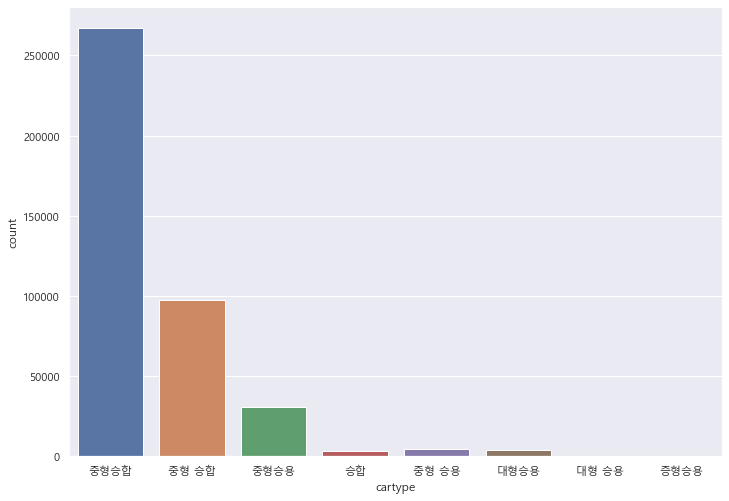

In [20]:
sns.countplot(data=df1, x = 'cartype')

# 지역 - 구 갯수 분석 

### startpos1 -> 시작 지역 '구'
### startpos2 -> 시작 지역 '동'

### endpos1 -> 종료 지역 '구'
### endpos2 -> 종료 지역 '동'

In [80]:
df1['startpos1'].nunique()

45

In [81]:
df1['endpos1'].nunique()

60

In [84]:
df1['startpos1'].unique()

array(['성북구', '중랑구', '구로구', '동대문구', '마포구', '영등포구', '광진구', '종로구', '금천구',
       '서대문구', '강남구', '용산구', '강서구', '노원구', '관악구', '도봉구', '송파구', '서초구',
       '양천구', '성동구', '은평구', '동작구', '중구', '강북구', '강동구', '광명시', '하남시',
       '의정부시', '성남시수정구', '성남시분당구', '양주시', '성남시중원구', '남양주시', '부천시오정구',
       '안양시만안구', '과천시', '김포시', '부천시소사구', '부천시원미구', '고양시덕양구', '구리시',
       '고양시일산동구', '안양시동안구', '고양시일산서구', '용인시수지구'], dtype=object)

In [83]:
df1['endpos1'].unique()

array(['동대문구', '노원구', '강북구', '관악구', '성북구', '부천시소사구', '중랑구', '광진구', '성동구',
       '구로구', '광명시', '서대문구', '용산구', '중구', '강서구', '도봉구', '영등포구', '송파구',
       '종로구', '강동구', '과천시', '강남구', '서초구', '양천구', '은평구', '마포구', '부평구',
       '금천구', '고양시일산서구', '동작구', '성남시분당구', '구리시', '성남시중원구', '안양시동안구',
       '의정부시', '고양시일산동구', '하남시', '안양시만안구', '고양시덕양구', '남양주시', '김포시',
       '부천시원미구', '양주시', '성남시수정구', '부천시오정구', '안산시상록구', '남동구', '수원시영통구',
       '용인시기흥구', '광주시', '파주시', '계양구', '화성시', '용인시수지구', '연수구', '서구', '여주군',
       '용인시처인구', '수원시팔달구', '평택시'], dtype=object)

ValueError: not enough values to unpack (expected 2, got 1)

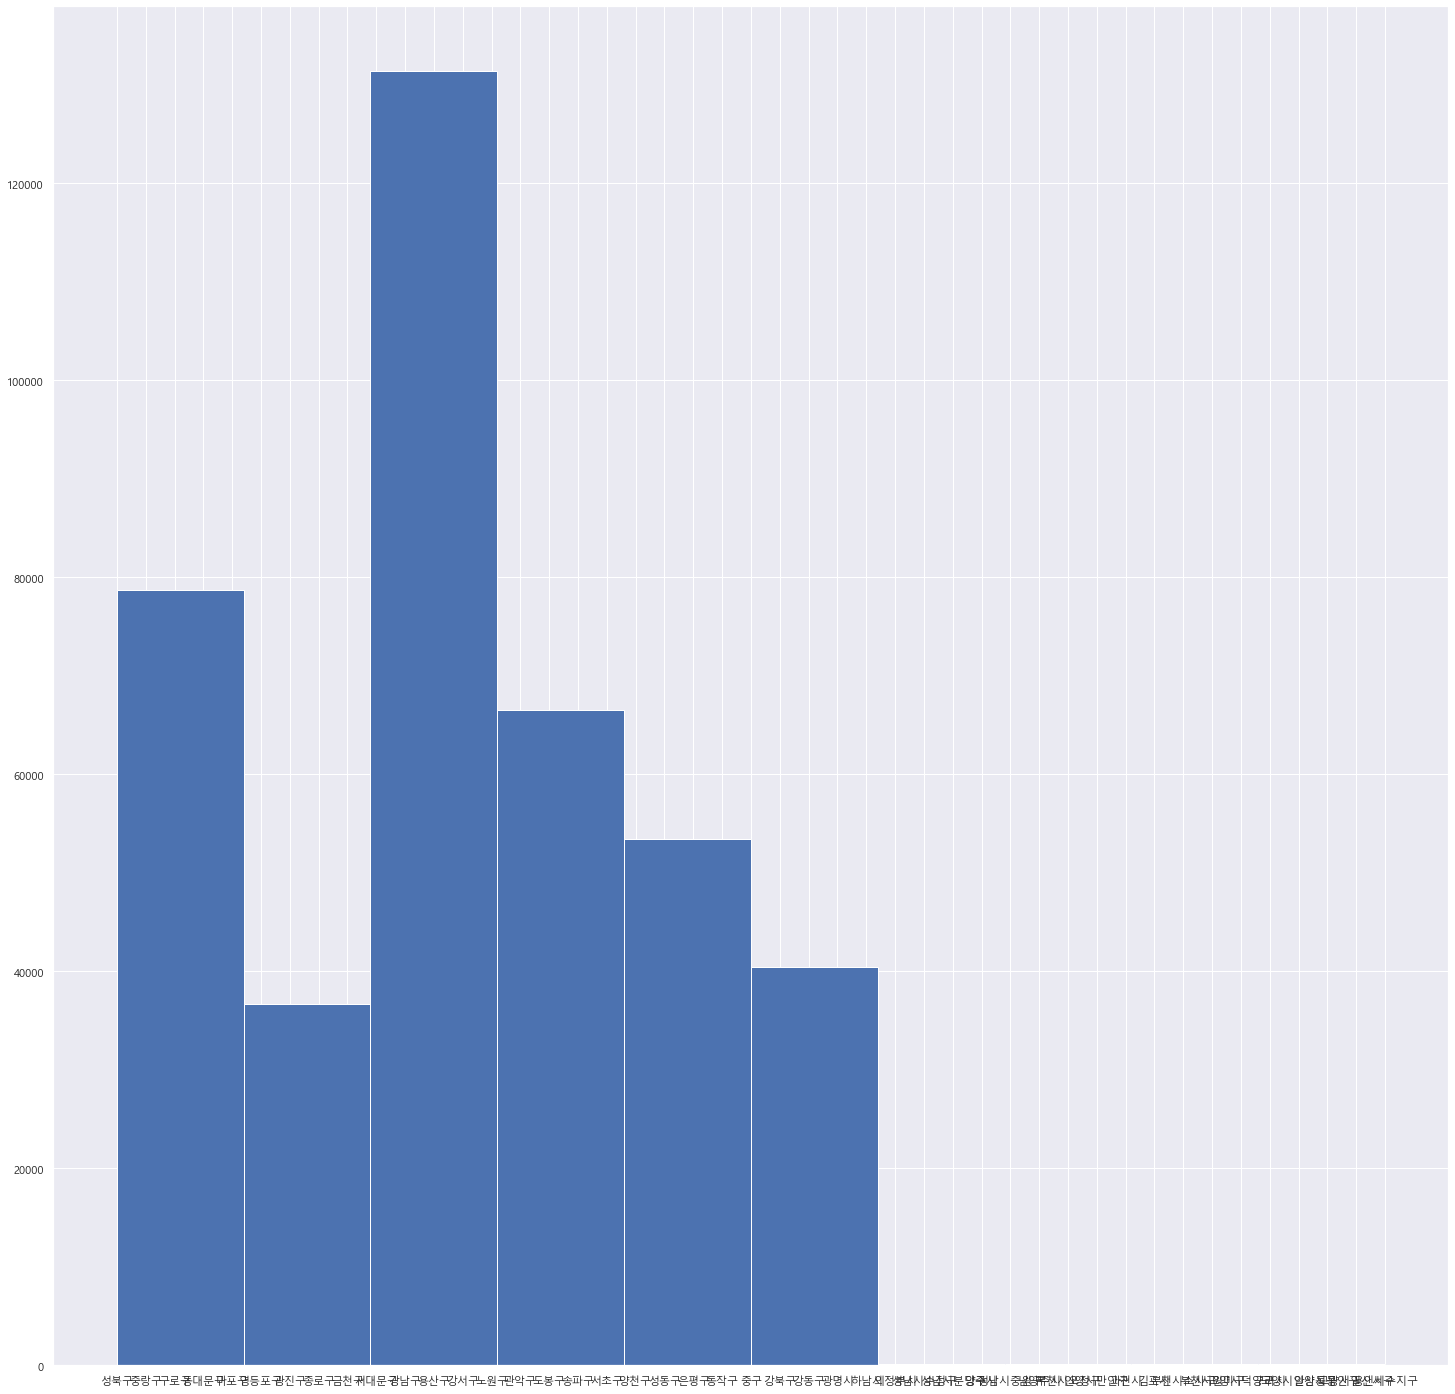

In [30]:
df1['startpos1'].hist(figsize = (25,25), bins = 10)
plt.ylim([10000,])
plt.show()

In [25]:
df1['startpos2'].nunique()

557

In [29]:
df1['endpos2'].nunique()

691

In [26]:
df1['startpos2'].unique()

array(['장위제1동', '면목제7동', '정릉제3동', '고척제2동', '회기동', '도화동', '상봉제1동', '여의동',
       '구의제1동', '청운효자동', '가산동', '영등포동', '남가좌제1동', '능동', '일원1동', '이태원제1동',
       '등촌제3동', '석관동', '하계1동', '상봉제2동', '은천동', '안암동', '합정동', '오류제1동',
       '방학제1동', '부암동', '장지동', '하계2동', '종암동', '중계2.3동', '양재2동', '가락본동',
       '면목제5동', '고척제1동', '삼성동', '성현동', '목1동', '면목제2동', '창신제1동', '삼선동',
       '난향동', '방배3동', '대림제3동', '잠실2동', '이문제3동', '세곡동', '북아현동', '인헌동',
       '쌍문제3동', '청룡동', '연희동', '망우본동', '성산제2동', '오류제2동', '왕십리도선동', '개봉제2동',
       '돈암제2동', '신사제1동', '대치1동', '신대방제1동', '상암동', '석촌동', '가양제1동', '논현1동',
       '월계2동', '시흥제3동', '신대방제2동', '화곡제3동', '대학동', '내곡동', '길음제1동', '역촌동',
       '신월2동', '가양제3동', '명동', '도봉제2동', '송천동', '방학제2동', '발산제1동', '삼성2동',
       '상계8동', '잠실7동', '장안제2동', '신길제6동', '방배2동', '둔촌제2동', '상계6.7동', '신설동',
       '역삼1동', '양재1동', '일원2동', '전농제2동', '방배4동', '행당제2동', '이촌제1동', '군자동',
       '수궁동', '가양제2동', '송중동', '신내2동', '아현동', '쌍문제4동', '상계1동', '공릉1.3동',
       '동선동', '수서동', '번제3동', '용두동', '응암제3동', '도곡2동', '쌍문제

In [27]:
df1['endpos2'].nunique()

691

In [28]:
df1['endpos2'].unique()

array(['회기동', '상계1동', '수유제3동', '은천동', '장위제2동', '심곡본1동', '신내2동', '돈암제2동',
       '능동', '행당제1동', '구로제4동', '철산3동', '남가좌제2동', '한강로동', '석관동', '월곡제2동',
       '신당제1동', '등촌제3동', '중계2.3동', '상봉제1동', '보라매동', '삼선동', '방학제1동', '명동',
       '대림제3동', '풍납2동', '창신제1동', '명일제1동', '청운효자동', '상계6.7동', '과천동',
       '일원본동', '휘경제2동', '고척제1동', '서원동', '둔촌제2동', '서초1동', '충현동', '신정6동',
       '회현동', '양평제2동', '수서동', '중앙동', '구산동', '신내1동', '하계1동', '서교동', '신원동',
       '일신동', '신정3동', '역곡3동', '교남동', '역삼1동', '독산제3동', '역촌동', '부암동', '상암동',
       '신정7동', '구의제1동', '탄현동', '영등포동', '광희동', '오류제1동', '서초2동', '응암제3동',
       '발산제1동', '흑석동', '목3동', '쌍문제3동', '신촌동', '논현1동', '화곡제6동', '연희동',
       '삼성1동', '번제1동', '종로1.2.3.4가동', '가양제1동', '송중동', '양재2동', '서초3동',
       '인수동', '당산제2동', '반포4동', '정자1동', '홍은제2동', '천호제1동', '방배3동', '개봉제1동',
       '갈매동', '쌍문제2동', '장지동', '오금동', '일원1동', '안암동', '도곡1동', '잠실4동', '여의동',
       '한남동', '광명5동', '길음제2동', '영종동', '동구동', '상대원1동', '삼평동', '월계1동',
       '대림제2동', '청룡동', '면목제3.8동', '야탑1동', '중곡제1동', '구로제5동', '

## 차량 고유번호별 빈도수 분석

<AxesSubplot:xlabel='no', ylabel='count'>

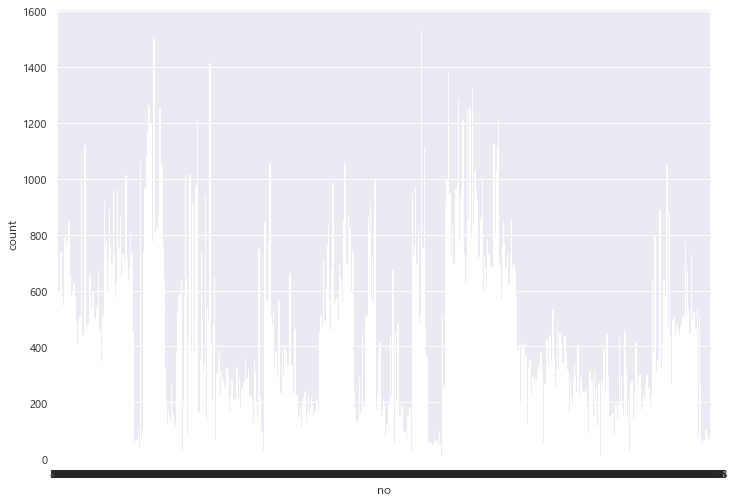

In [49]:
sns.countplot(data=df1, x='no')

In [42]:
df1['no'].count()

407613

<AxesSubplot:xlabel='no'>

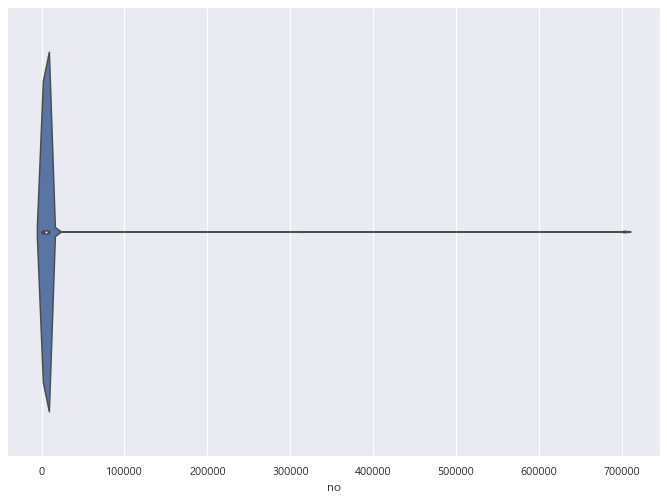

In [58]:
sns.violinplot(data=df1, x='no')

<AxesSubplot:xlabel='no'>

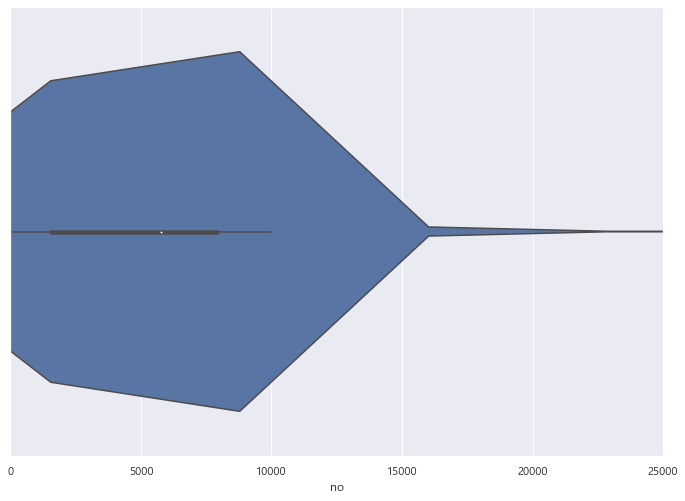

In [56]:
plt.xlim(0,25000)
sns.violinplot(data=df1, x='no')

<AxesSubplot:xlabel='no'>

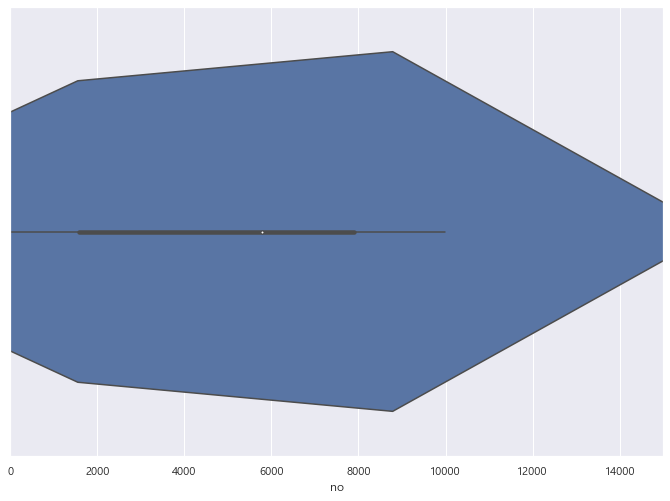

In [61]:
plt.xlim(0,15000)
sns.violinplot(data=df1, x='no')

<AxesSubplot:xlabel='no'>

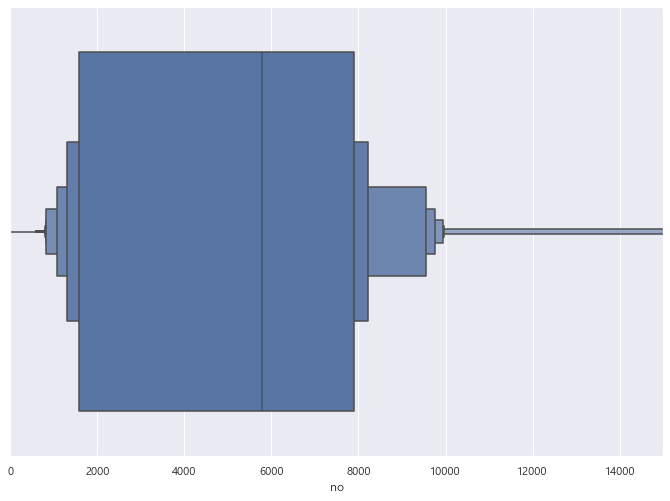

In [60]:
plt.xlim(0,15000)
sns.boxenplot(data=df1, x='no')

NameError: name 'count' is not defined

array(['동대문구', '노원구', '강북구', '관악구', '성북구', '부천시소사구', '중랑구', '광진구', '성동구',
       '구로구', '광명시', '서대문구', '용산구', '중구', '강서구', '도봉구', '영등포구', '송파구',
       '종로구', '강동구', '과천시', '강남구', '서초구', '양천구', '은평구', '마포구', '부평구',
       '금천구', '고양시일산서구', '동작구', '성남시분당구', '구리시', '성남시중원구', '안양시동안구',
       '의정부시', '고양시일산동구', '하남시', '안양시만안구', '고양시덕양구', '남양주시', '김포시',
       '부천시원미구', '양주시', '성남시수정구', '부천시오정구', '안산시상록구', '남동구', '수원시영통구',
       '용인시기흥구', '광주시', '파주시', '계양구', '화성시', '용인시수지구', '연수구', '서구', '여주군',
       '용인시처인구', '수원시팔달구', '평택시'], dtype=object)

In [ ]:
### 동대문구, 노원구, 강북구, 관악구, 부천시소사구, 중랑구, 성동구, 광명시, 